In [1]:
import tensorflow as tf
print(f"tensorflow v{tf.__version__}")

tensorflow v2.5.0-dev20210213


## Convolutional neural network

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Load and preprocess dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

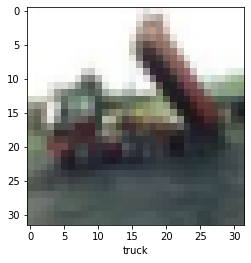

In [4]:
IMG_INDEX = 2  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

### CNN Architecture

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

The input shape of our data will be 32, 32, 3 and we will process 32 filters of size 3x3 over our input data. 

We will also apply the activation function relu to the output of each convolution operation.

**Layer 2**

This layer will perform the max pooling operation using 2x2 samples and a stride of 2.

**Other Layers**

The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### Training

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=8, validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 [==============================] - 8s 4ms/step - loss: 1.7373 - accuracy: 0.3614 - val_loss: 1.2640 - val_accuracy: 0.5403
Epoch 2/8
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1999 - accuracy: 0.5745 - val_loss: 1.1315 - val_accuracy: 0.5953
Epoch 3/8
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0155 - accuracy: 0.6439 - val_loss: 1.0131 - val_accuracy: 0.6481
Epoch 4/8
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9088 - accuracy: 0.6791 - val_loss: 0.9135 - val_accuracy: 0.6818
Epoch 5/8
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8344 - accuracy: 0.7085 - val_loss: 0.9208 - val_accuracy: 0.6829
Epoch 6/8
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7651 - accuracy: 0.7321 - val_loss: 0.8866 - val_accuracy: 0.6965
Epoch 7/8
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7210 - accuracy: 0.7458 - val_loss: 0.8635 - val_accuracy: 0.7027

### Evaluation

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'test accuracy: {(test_acc * 100):.3f}%')

313/313 - 1s - loss: 0.8670 - accuracy: 0.7074
test accuracy: 70.740%


### Data Augmentation (when working with small datasets)

Turning a single image to a bunch of different images by compressing, rotating and etc

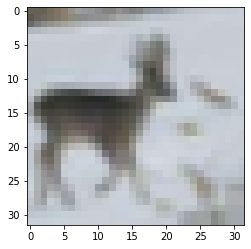

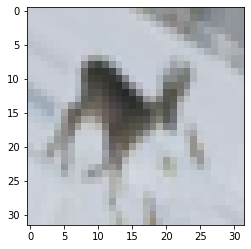

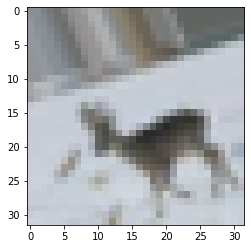

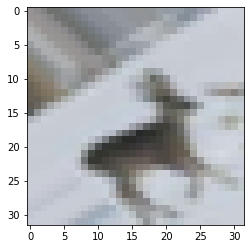

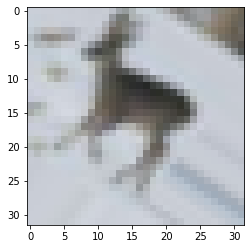

In [10]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_img = train_images[20] # pick an image to transform
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()